# Building a Cup

In this example, we'll create a very basic cylindrical cup using OnPy.

First, let's create a new document.

In [ ]:
import onpy

document = onpy.create_document("Cup Example")

Each document contains a partstudio. We can reference the partstudio with the following.

In [ ]:
partstudio = document.get_partstudio()

Using the partstudio object, we can create different features. Each model in OnShape is created via a series of features. 

One of the most important features in any CAD software is the Sketch feature; here, you can create 2D geometries that can be extended to 3D. In this example, we'll create two sketches. The first will be the base of our cup; just a simple circle. We'll extrude this sketch up by a few inches, then create a another sketch on top of the extrusion. From here, we'll draw another circle and extrude it down. In doing so, we'll cut through the solid created by the first extrude.

Let's start by creating that circular sketch.

In [ ]:
# First, we'll create a new sketch
base_sketch = partstudio.add_sketch(
    plane=partstudio.features.top_plane,  # Each partstudio has three planes. We'll select the top plane so our cup points upright
    name="Base Sketch",  # We can add an optional name to our sketch too
)

# Then, we'll add a circle to it
base_sketch.add_circle(
    center=(0, 0),  # the center of this circle will be at the sketch origin
    radius=2,  # this cup will have a radius of 2 inches
)

Next, we'll extrude this sketch by a few inches. 

In [ ]:
# We'll create a new extrude feature
extrude = partstudio.add_extrude(
    faces=base_sketch,  # we'll extrude the entire sketch we created
    distance=4,  # then, we'll extrude this by four inches
)

# And, we'll get a reference to the part that this extrusion created
cup_part = extrude.get_created_parts()[0]

Now, if we look in the OnShape UI, we can see the cylinder we have so far:

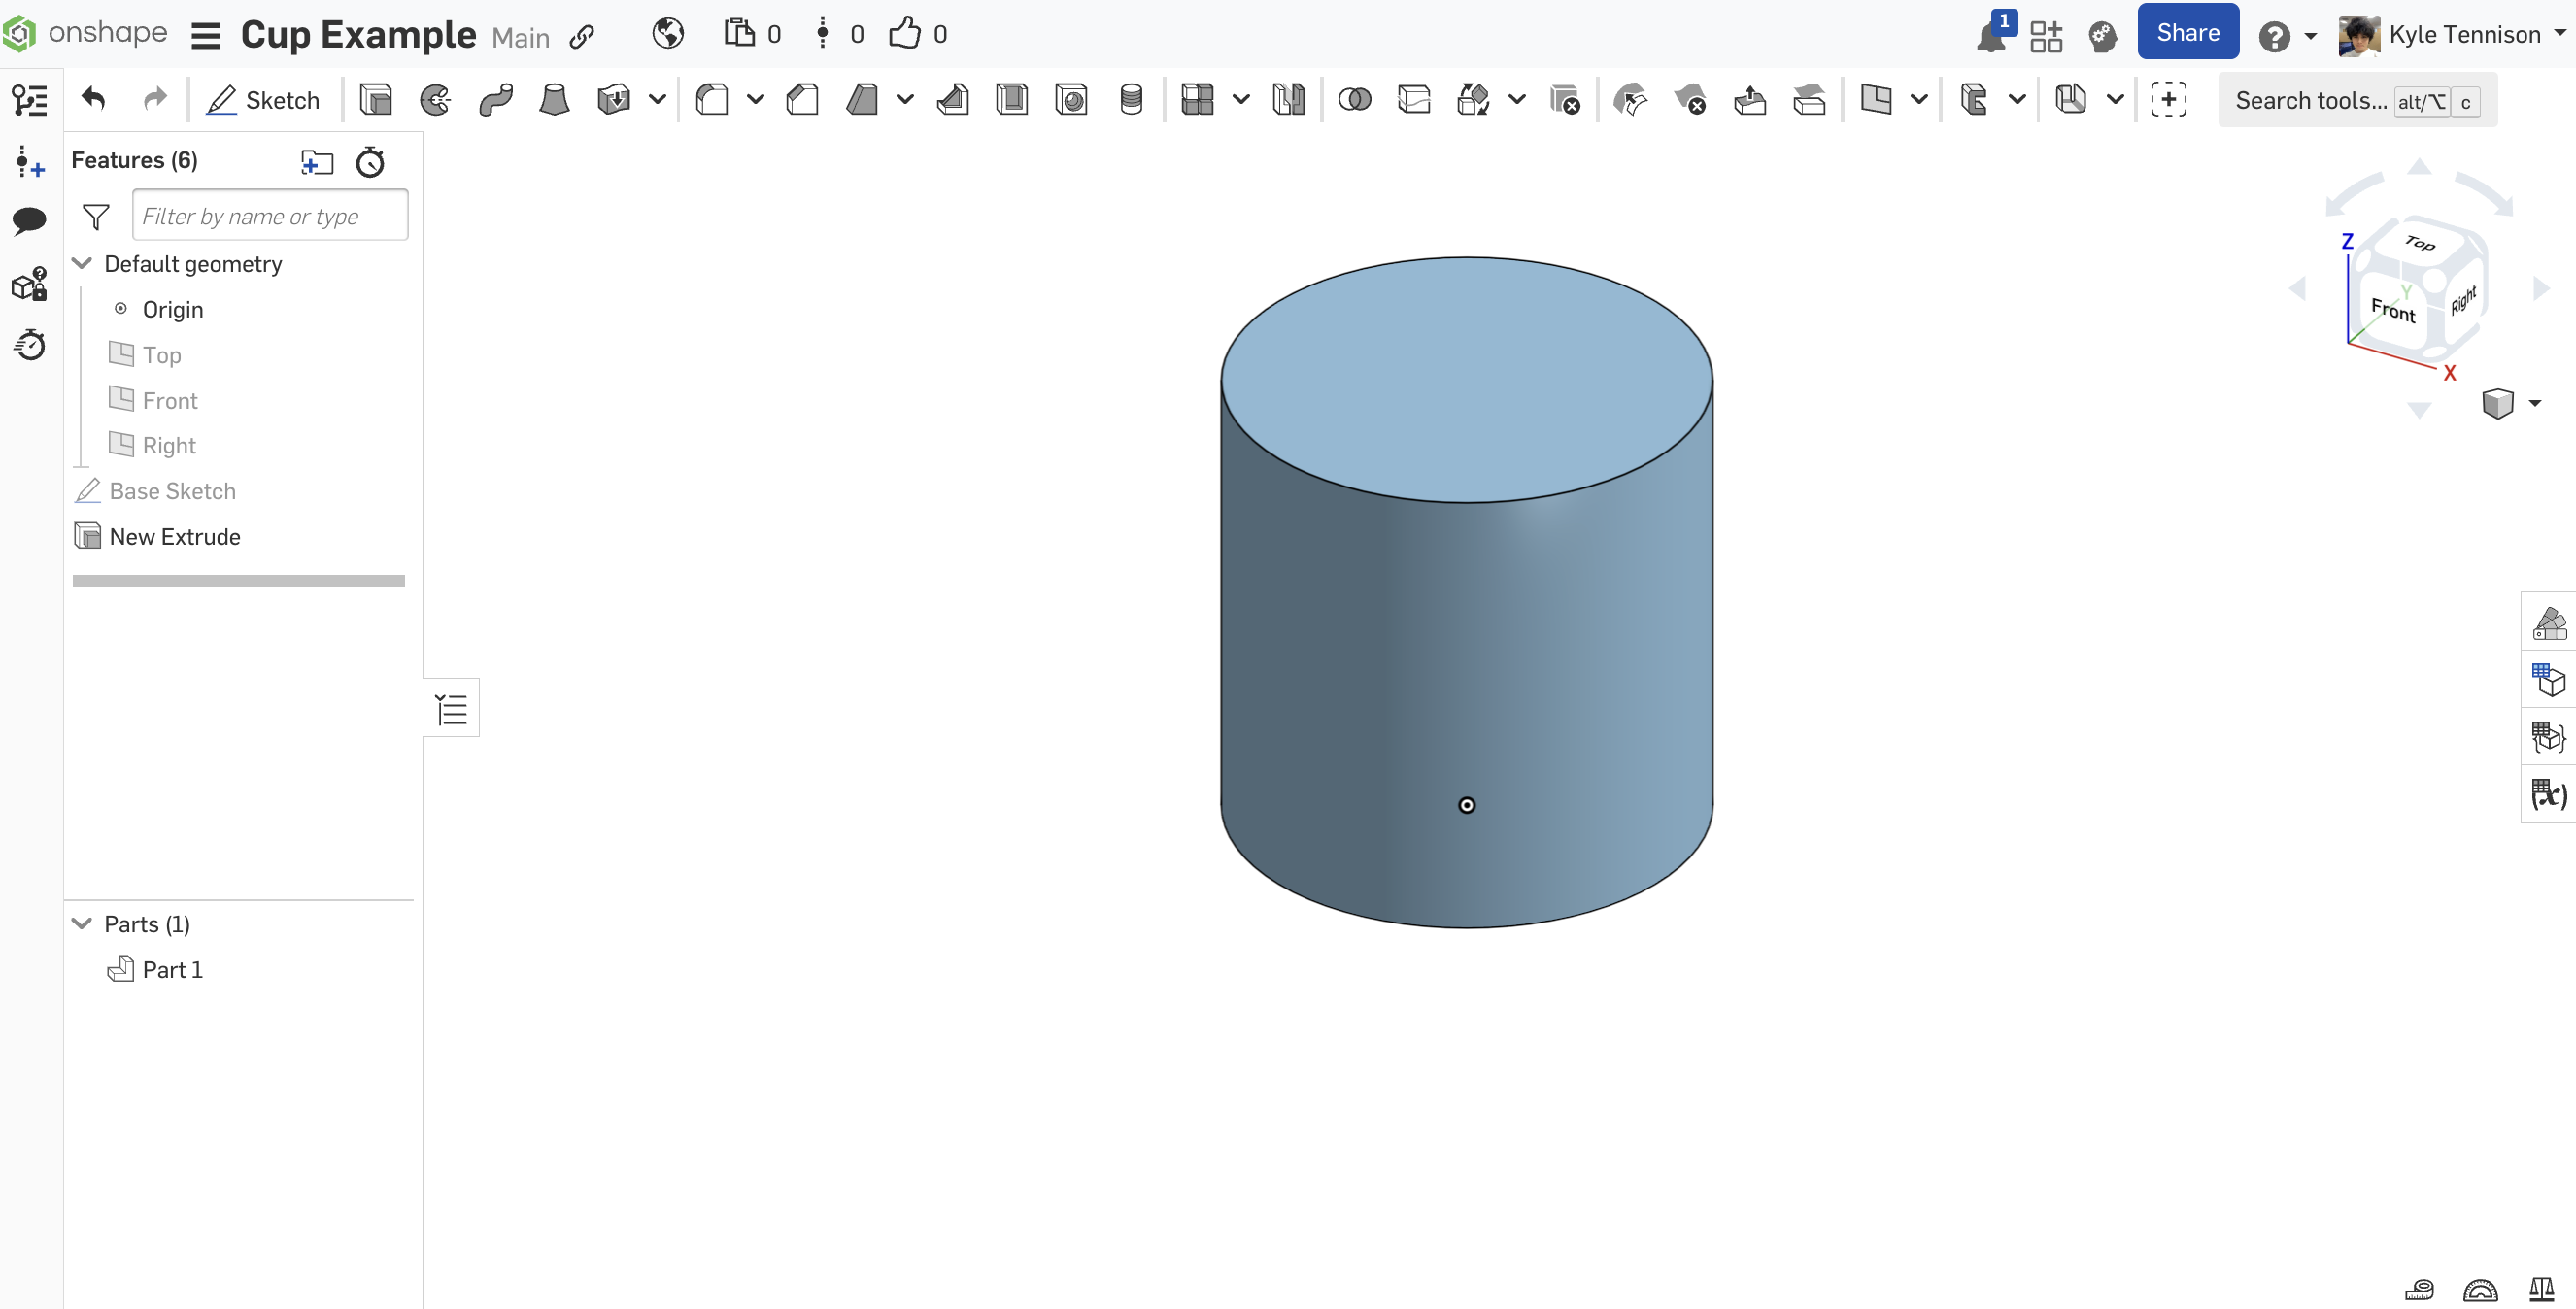

To make this into a cup, we need to draw another sketch on top of this circle, then cut out a smaller cylinder. First, let's create the sketch:

In [ ]:
# Here, we create a new sketch that we'll put on top of the current cylinder
cut_profile = partstudio.add_sketch(
    plane=cup_part.faces.closest_to(
        (0, 0, 4)
    ),  # the cup part has multiple faces. We want the one on top
    name="Cut Profile",  # here, we add another optional name for our sketch
)

There's a few things going on in this cell. Sketches and parts contain entities that can be queried. In OnShape, there are four types of entities: vertices, edges, faces, and bodies. We could reference these with:

```python
cup_profile.faces
cup_profile.edges
cup_profile.vertices
```

> The cup part itself is a body entity, so it does not contain a list of body entities.

For each of these properties, we can query the different entities. In this example, we query the face that is closest to the point $(0,0,4)$, but, we could have used the following queries:

```python
.closest_to(point)
.contains_point(point)
.largest()
.smallest()
.intersects(origin, line_direction)
.is_type(entity_type)
```

In this case, using `cup_part.faces.closest_to((0,0,4))` returns the face entity that is closest to $(0,0,4)$, which, in this case, corresponds to the top of the cylinder.

Now that we have this new sketch object, we can draw another circle and extrude it into the cup to cut it.

In [ ]:
cut_profile.add_circle(
    center=(0, 0), radius=1.9
)  # we'll make the inner radius slightly smaller than the outer

cut_extrude = partstudio.add_extrude(
    faces=cut_profile,  # again, we'll extrude the entire sketch
    distance=-3.9,  # we'll cut down into the part 3.9 inches, a leaving 0.1 inch wall
    subtract_from=cup_part,  # here, we tell OnPy to subtract from an existing part instead of creating a new part
)

Congratulations! If you look in the OnShape UI, you can see the cup we have now created, entirely through python.

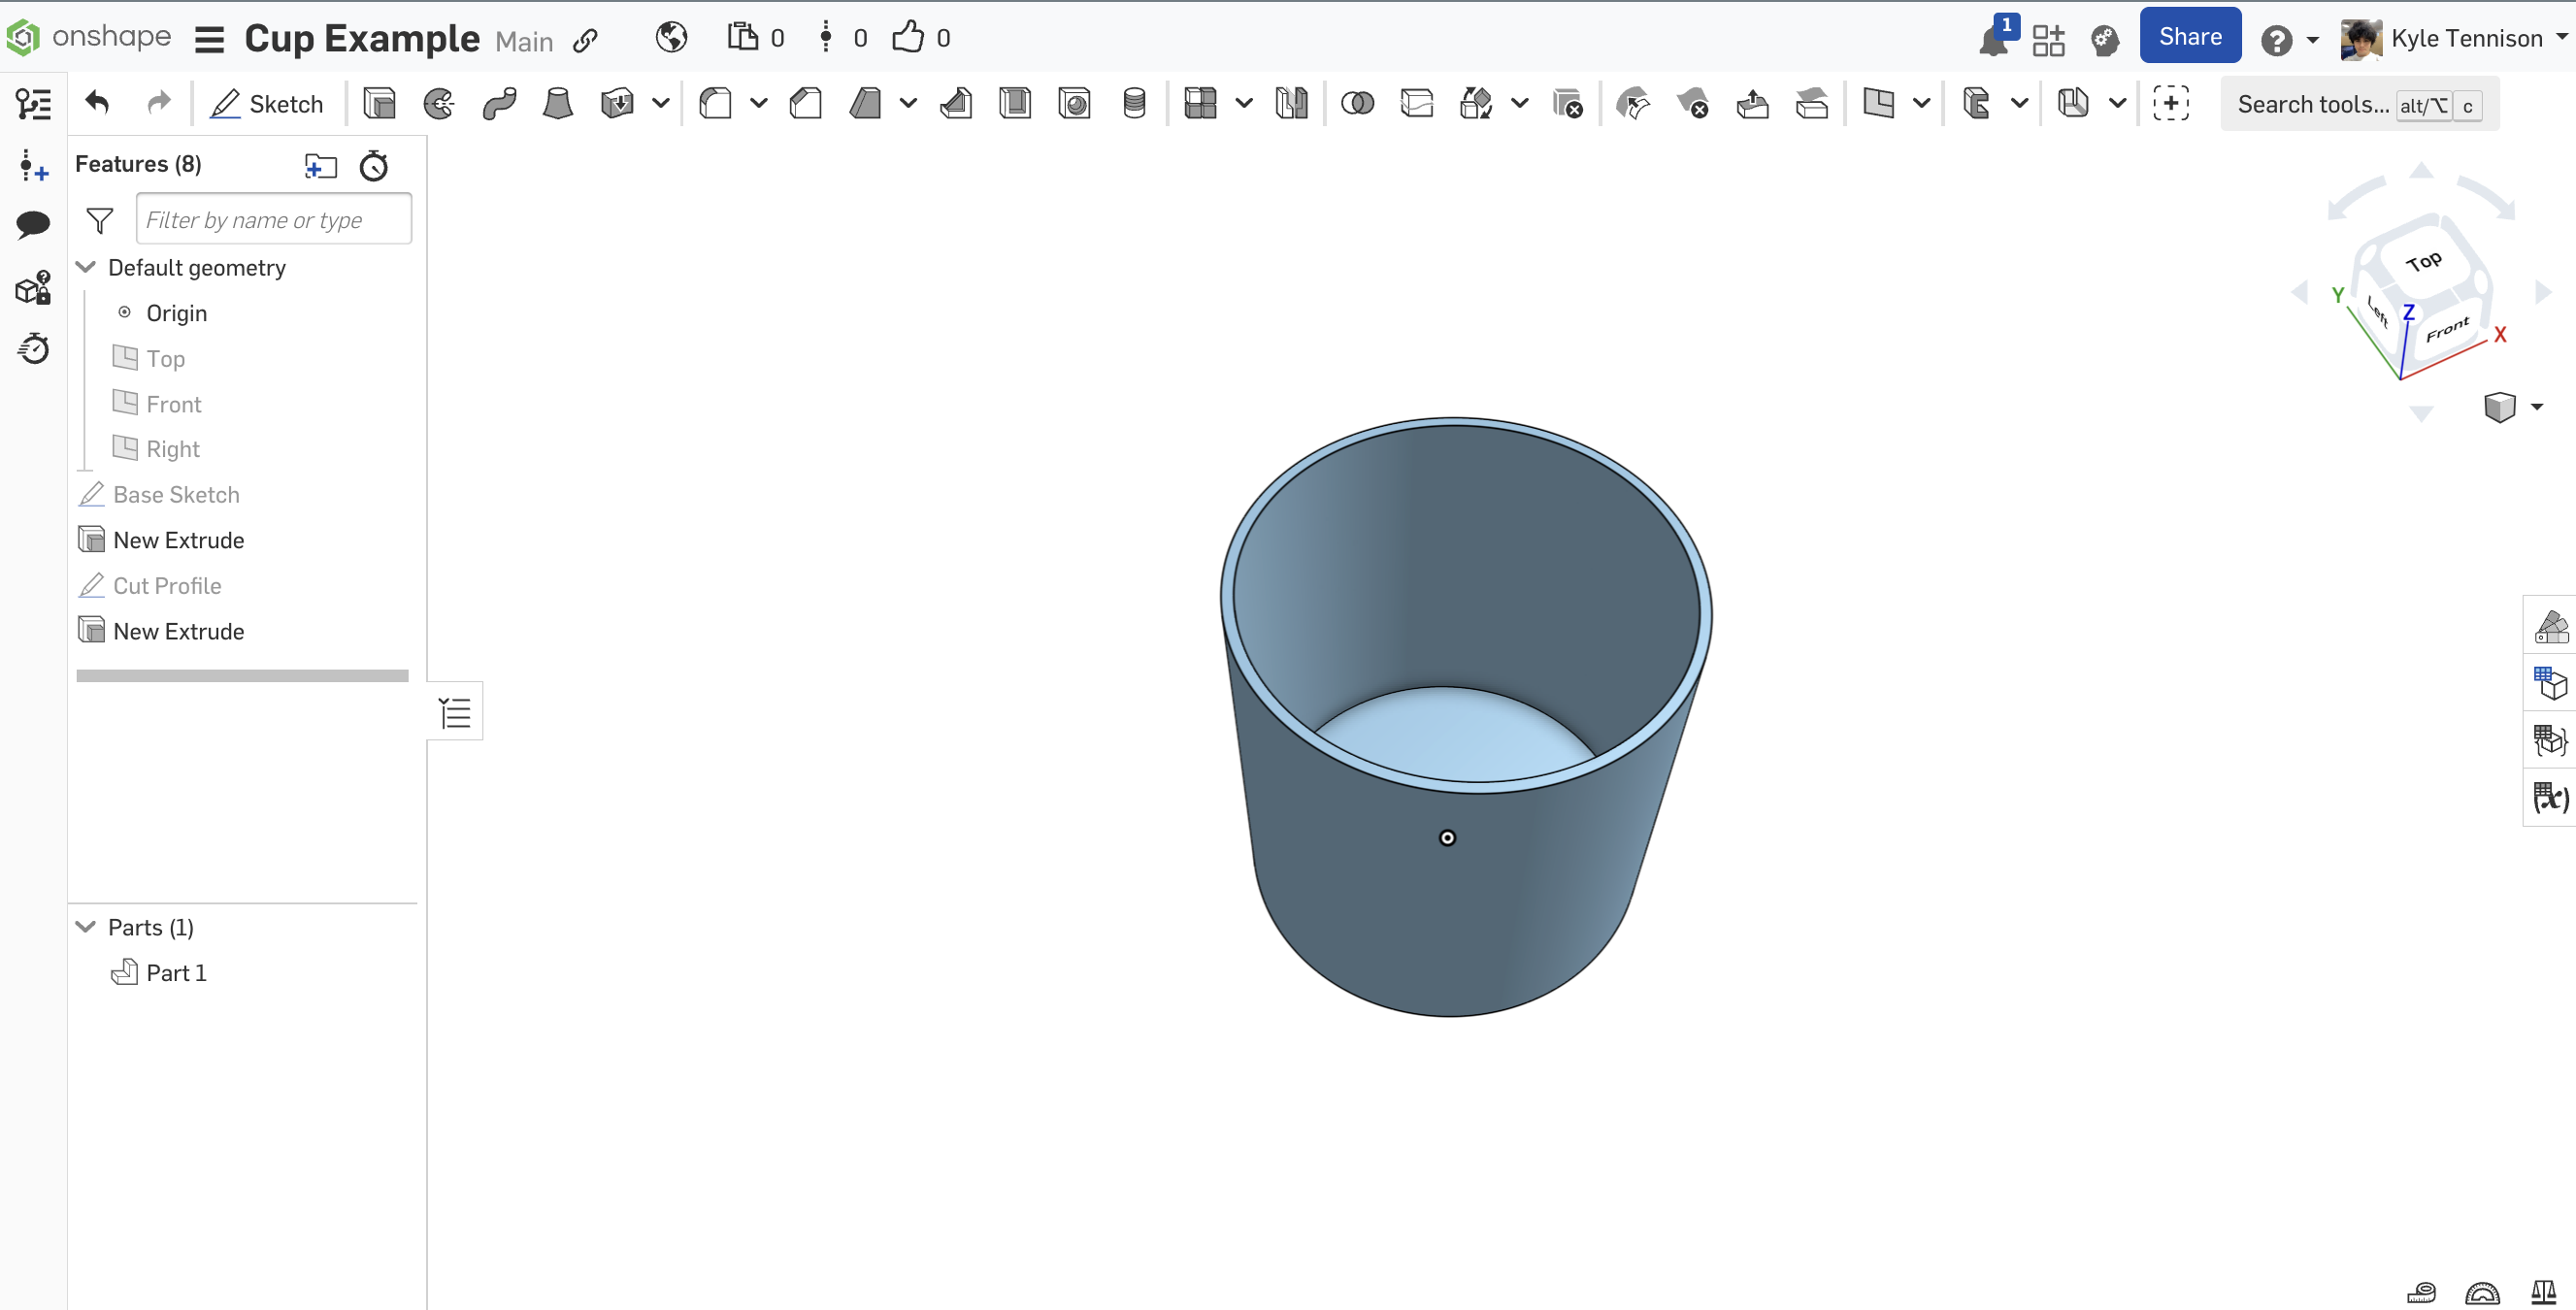